In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
learning_rate = 0.01
training_epochs = 100
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33 

In [ ]:
x_tf = tf.placeholder(tf.float32)
y_tf = tf.placeholder(tf.float32)
w = tf.Variable(0.0,name='weight')

In [ ]:
y_pred = tf.multiply(x_tf,w)

In [ ]:
loss = tf.square(y_pred - y_tf) 

In [ ]:
train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for x,y in zip(x_train,y_train):
            sess.run(train_op,feed_dict={x_tf:x,y_tf:y})
    w_eval = sess.run(w)

In [ ]:
w_eval

In [ ]:
plt.scatter(x_train, y_train)
y_learned = x_train*w_eval
plt.plot(x_train, y_learned, 'r')
plt.show()

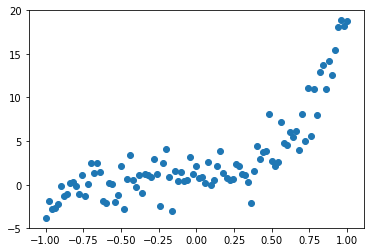

In [2]:
learning_rate = 0.01
training_epochs = 40
trX = np.linspace(-1, 1, 101)
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
trY += np.random.randn(*trX.shape) * 1.5
plt.scatter(trX, trY)
plt.show()

In [3]:
tf_x = tf.placeholder(tf.float32)
tf_y = tf.placeholder(tf.float32)
w = tf.Variable(tf.zeros(shape=6))

In [4]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
    terms.append(term)
    return tf.add_n(terms) 

In [7]:
y_pred = model(tf_x,w)
cost = tf.square(y_pred-tf_y)
train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [9]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for x,y in zip(trX,trY):
            sess.run(train_op,feed_dict={tf_x:x,tf_y:y})
    w_eval = sess.run(w)

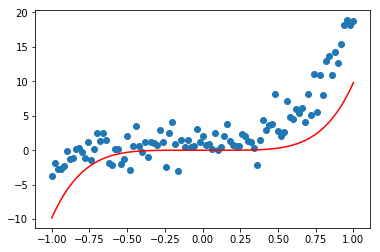

In [14]:
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_eval[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()